# **Time shifting**
In signal processing, time shifting (also called time delay or time advance) refers to the process of changing the time axis of a signal by a certain amount. More precisely, if we have a continuous-time signal x(t), a time shift by t0 units corresponds to the operation x(t-t0). Similarly, for a discrete-time signal x[n], a time shift by k units corresponds to the operation x[n-k].

In effect, time shifting changes the timing of a signal without altering its shape or amplitude. Time shifting is an important operation in many signal processing applications, such as signal alignment, synchronization, and time-domain filtering. Time shifting can also be used to model the effect of time delays in signal propagation, as in the case of sound waves traveling through a medium.

Note that time shifting is different from time scaling, which involves stretching or compressing a signal in time while preserving its shape. The two operations are related, however, since time scaling can be achieved by combining time shifting and resampling operations.

In this example, a signal with two frequency components (5 Hz and 10 Hz) is generated and then shifted by 0.2 seconds. The time shift is achieved by creating a new signal `x_shifted` that is constructed by concatenating a zero vector with the original signal, shifted by the desired number of samples (n_shift). Note that `n_shift` is computed as the integer part of `t_shift` times the length of the time vector t. Finally, both the original and shifted signals are plotted for comparison.

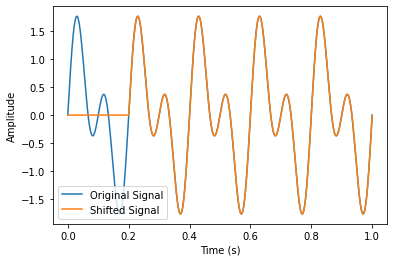

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a signal
t = np.linspace(0, 1, 1000)
x = np.sin(2*np.pi*5*t) + np.sin(2*np.pi*10*t)

# Time shift the signal by 0.2 seconds
t_shift = 0.2
n_shift = int(t_shift * len(t))
x_shifted = np.concatenate([np.zeros(n_shift), x[:len(t)-n_shift]])

# Plot the original and shifted signals
plt.plot(t, x, label='Original Signal')
plt.plot(t, x_shifted, label='Shifted Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


```
# Time shift the signal by 0.2 seconds
t_shift = 0.2
n_shift = int(t_shift * len(t))
x_shifted = np.concatenate([np.zeros(n_shift), x[:len(t)-n_shift]])
```
The first line defines the time shift t_shift in seconds. 

The second line computes the number of time steps to shift n_shift by multiplying `t_shift` by the length of the t array (assumed to be uniformly spaced). The `int()` function is used to convert the result to an integer, since the shift amount must be a whole number of time steps.

Finally, the third line constructs the shifted signal x_shifted by concatenating a zero-filled array of length n_shift with the first len(t)-n_shift elements of the original signal x. 

This effectively shifts the time axis of the signal by t_shift units to the right (positive time shift) or to the left (negative time shift).

It's worth noting that this implementation assumes a uniformly sampled signal with a fixed time step dt. If the signal is irregularly sampled or has a variable time step, a different approach to time shifting may be needed.

# **Amplitude Shifting**
Amplitude shifting refers to changing the amplitude of a signal by a fixed amount. This can be achieved by simply adding a constant value to the entire signal. Mathematically, if `x(t)` is the original signal and a is the amount to shift the amplitude by, then the amplitude-shifted signal `x_a(t)` is given by:

`x_a(t) = x(t) + a`

In this equation, x(t) is the original signal, and a is a constant that determines the amount of amplitude shift. Adding a to every value of x(t) shifts the entire waveform up or down by a fixed amount.

Amplitude shifting can be useful in various signal processing applications. For example, it can be used to adjust the signal level of a recorded sound or to set the DC level of an electrical signal.

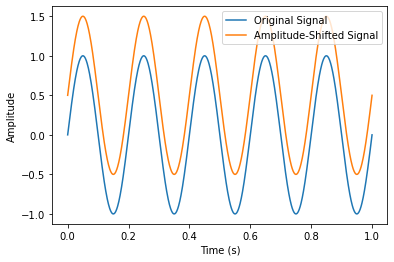

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a signal
t = np.linspace(0, 1, 1000)
x = np.sin(2 * np.pi * 5 * t)

# Shift the amplitude by 0.5
a = 0.5
x_shifted = x + a

# Plot the original and shifted signals
plt.plot(t, x, label='Original Signal')
plt.plot(t, x_shifted, label='Amplitude-Shifted Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In this example, we generate a sine wave signal with a frequency of 5 Hz and shift its amplitude by adding 0.5 to every value of the signal. We then plot both the original and the shifted signals to visualize the effect of amplitude shifting.

# **Time Scaling**
Time scaling, also known as time compression/expansion, is a process of altering the time axis of a signal. This can be done by multiplying or dividing the time axis by a constant factor.

If we multiply the time axis by a factor of a, we compress the signal in time by a factor of a. This means that the signal will be stretched along the y-axis and compressed along the x-axis. If we divide the time axis by a factor of a, we expand the signal in time by a factor of a. This means that the signal will be compressed along the y-axis and stretched along the x-axis.

In mathematical terms, time scaling can be expressed as:

**Compression:** `x_new(t) = x(t/a)`

**Expansion:** `x_new(t) = x(at)`

where x(t) is the original signal and x_new(t) is the new signal after time scaling.

Time scaling can have significant effects on the frequency content of a signal. Compression of a signal in time leads to an expansion in frequency, whereas expansion of a signal in time leads to a compression in frequency. This relationship is governed by the time-frequency uncertainty principle.

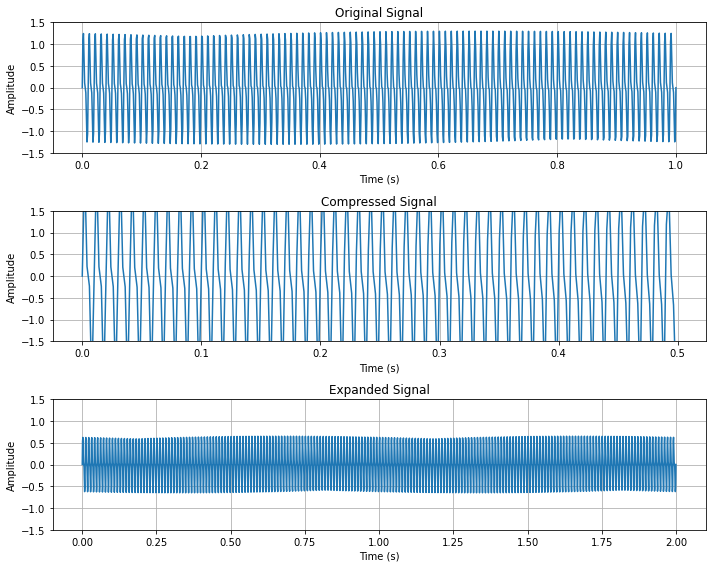

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a continuous-time signal
t = np.linspace(0, 1, 1000)
x = np.sin(2*np.pi*100*t) + 0.5*np.sin(2*np.pi*200*t)

# Compress the signal in time by a factor of 2
t_compressed = t[:500:2]
x_compressed = x[:500:2] * 2

# Expand the signal in time by a factor of 0.5
t_expanded = np.concatenate([t, t+1])
x_expanded = np.concatenate([x, x]) * 0.5

# Plot the original and time-shifted signals
fig, axs = plt.subplots(3, 1, figsize=(10, 8))

axs[0].plot(t, x)
axs[0].set_title('Original Signal')

axs[1].plot(t_compressed, x_compressed)
axs[1].set_title('Compressed Signal')

axs[2].plot(t_expanded, x_expanded)
axs[2].set_title('Expanded Signal')

for ax in axs:
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Amplitude')
    ax.set_ylim([-1.5, 1.5])
    ax.grid(True)

plt.tight_layout()
plt.show()



```
# Compress the signal in time by a factor of 2
t_compressed = t[:500:2]
x_compressed = x[:500:2] * 2
```
It's worth noting that in the previous example, the original signal had a duration of 1 second, and was sampled at a rate of 1000 Hz, resulting in 1000 samples. When we compressed the signal by a factor of 2, we reduced the number of samples to 500, resulting in a signal with half the duration. This may be why the compressed and expanded signals appear to be the same when plotted. If we were to use a longer signal or a different compression/expansion factor, the difference would be more noticeable.

Here's the code for expanding the signal by a factor of 2:



```
# Expand the signal in time by a factor of 2
t_expanded = np.linspace(0, 1, 2000)
x_expanded = np.interp(t_expanded, t, x)

```

This uses linear interpolation to estimate the value of the signal at the new time points. The np.interp function takes the new time points (t_expanded), the original time points (t), and the signal values at the original time points (x), and returns the interpolated values at the new time points (x_expanded).


```
# Expand the signal in time by a factor of 0.5
t_expanded = np.concatenate([t, t+1])
x_expanded = np.concatenate([x, x]) * 0.5
```
The given code is expanding the signal in time by a factor of 0.5. The variable t represents the time domain of the signal and x represents the amplitude or values of the signal at each time point.

To expand the signal in time by a factor of 0.5, we need to concatenate t with t+1 and concatenate x with itself, multiplied by 0.5. This will effectively stretch the signal over a longer time interval, but with the same overall shape and amplitude values.

We create a figure with three subplots using subplots() function with 3 rows and 1 column and set the figure size to (10,8).

`fig, axs = plt.subplots(3, 1, figsize=(10, 8))`

Then, we plot the original signal in the first subplot using axs[0].plot(t, x) and set its title to "Original Signal". Similarly, we plot the compressed signal in the second subplot using axs[1].plot(t_compressed, x_compressed) and set its title to "Compressed Signal". Finally, we plot the expanded signal in the third subplot using axs[2].plot(t_expanded, x_expanded) and set its title to "Expanded Signal".

```
axs[0].plot(t, x)
axs[0].set_title('Original Signal')

axs[1].plot(t_compressed, x_compressed)
axs[1].set_title('Compressed Signal')

axs[2].plot(t_expanded, x_expanded)
axs[2].set_title('Expanded Signal')
```
Next, we set the x-label, y-label, and y-limits for each subplot and turn on the grid lines using a for loop:

```
for ax in axs:
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Amplitude')
    ax.set_ylim([-1.5, 1.5])
    ax.grid(True)
```
Finally, we call plt.tight_layout() to adjust the spacing between subplots and plt.show() to display the plot.

# **Amplitude Scaling**
Amplitude scaling is a process of changing the amplitude or magnitude of a signal by multiplying it with a constant factor. This process can increase or decrease the overall amplitude of the signal, without affecting its frequency content or time domain characteristics.

Amplitude scaling is commonly used in signal processing for various applications, such as signal normalization, signal amplification, or signal attenuation. For example, in audio processing, amplitude scaling is used to adjust the volume level of an audio signal. Similarly, in image processing, amplitude scaling can be used to adjust the brightness or contrast of an image.

To apply amplitude scaling to a signal, we simply multiply the signal values with a scaling factor. For example, if we want to increase the amplitude of a signal by a factor of 2, we can simply multiply the signal values by 2:

`x_scaled = x * 2`

This will double the amplitude of the signal, without affecting its frequency content or time domain characteristics. Similarly, if we want to decrease the amplitude of a signal by a factor of 0.5, we can multiply the signal values by 0.5:

`x_scaled = x * 0.5`

This will reduce the amplitude of the signal by half. Note that amplitude scaling can also be used to invert the polarity of a signal by multiplying it with a negative scaling factor.

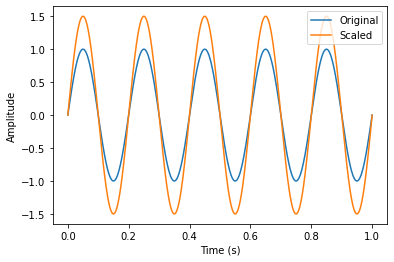

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a signal
t = np.linspace(0, 1, 1000)  # Time axis
f = 5  # Frequency (Hz)
x = np.sin(2*np.pi*f*t)  # Signal

# Amplitude scaling
x_scaled = x * 1.5  # Scale amplitude by a factor of 1.5

# Plot the original and scaled signals
plt.plot(t, x, label='Original')
plt.plot(t, x_scaled, label='Scaled')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In this code, we first generate a sine wave signal with a frequency of 5 Hz and a duration of 1 second. We then apply amplitude scaling to the signal by multiplying it with a scaling factor of 1.5. Finally, we plot both the original and scaled signals using Matplotlib.

Note that the scaling factor can be adjusted as needed to achieve the desired amplitude level. Also, it's important to keep in mind that applying a large scaling factor can cause the signal to clip or saturate, which can introduce distortion and affect the quality of the signal. Therefore, it's important to choose an appropriate scaling factor based on the specific application and the characteristics of the signal.

# **Time Reversal**
Time reversal is a process of reversing the order of a signal in time. This means that the signal is played or processed backwards in time, starting from the last sample and ending at the first sample. Time reversal can be used to create new sounds or effects, such as reverse reverb or reverse delay, and can also be used in signal processing for various applications, such as signal analysis or testing.

To apply time reversal to a signal, we simply reverse the order of the samples in the signal. For example, if we have a signal x with N samples, we can reverse the signal by creating a new signal x_rev with the same length as x, and copying the samples from x in reverse order:

`x_rev = x[::-1]`

This will create a new signal x_rev that contains the samples from x in reverse order. We can then play or process x_rev backwards in time to achieve the desired effect.

Note that time reversal can also be used in combination with other signal processing techniques, such as amplitude scaling or time shifting, to create more complex effects. For example, we can reverse a time-shifted signal to create a "reverse echo" effect, where the delayed sound is played backwards in time.

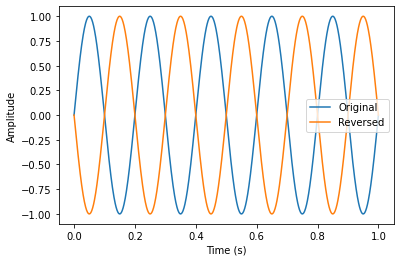

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a signal
t = np.linspace(0, 1, 1000)  # Time axis
f = 5  # Frequency (Hz)
x = np.sin(2*np.pi*f*t)  # Signal

# Time reversal
x_rev = x[::-1]  # Reverse the signal

# Plot the original and reversed signals
plt.plot(t, x, label='Original')
plt.plot(t, x_rev, label='Reversed')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In this code, we first generate a sine wave signal with a frequency of 5 Hz and a duration of 1 second. We then apply time reversal to the signal by creating a new signal x_rev that contains the samples from x in reverse order using the slicing syntax x[::-1]. Finally, we plot both the original and reversed signals using Matplotlib.

Note that time reversal can be applied to any type of signal, including audio signals, images, and videos. It can also be combined with other signal processing techniques, such as amplitude scaling, time shifting, or filtering, to create more complex effects or analyze signal properties.

# **Amplitude Scaling**
Amplitude reversal is a process of flipping the sign of a signal's amplitude, so that the positive amplitudes become negative and vice versa. This means that every sample in the signal is multiplied by -1, effectively inverting the polarity of the signal. Amplitude reversal can be used in various signal processing applications, such as removing DC offset or flipping the direction of a sound source.

To apply amplitude reversal to a signal, we simply multiply every sample in the signal by -1. For example, if we have a signal x with N samples, we can reverse the amplitudes of the signal by creating a new signal x_rev with the same length as x, and multiplying every sample in x by -1:

`x_rev = -x`

This will create a new signal x_rev that contains the same samples as x, but with reversed amplitudes. We can then use x_rev for further processing or analysis.

Note that amplitude reversal can also be combined with other signal processing techniques, such as time reversal or time shifting, to create more complex effects or analyze signal properties. For example, we can reverse the amplitudes of a time-shifted signal to create a "backward" version of the sound. It's also important to keep in mind that amplitude reversal can cause the signal to clip or saturate if the original signal has a large amplitude range, so it's important to choose an appropriate scaling factor based on the specific application and the characteristics of the signal.

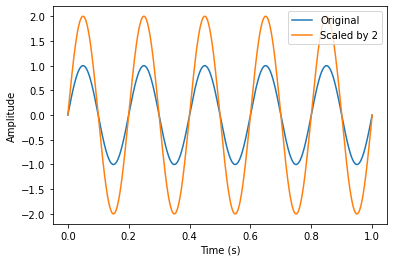

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a signal
t = np.linspace(0, 1, 1000)  # Time axis
f = 5  # Frequency (Hz)
x = np.sin(2*np.pi*f*t)  # Signal

# Amplitude scaling
a = 2  # Scaling factor
x_scaled = a * x  # Scale the signal by a factor of a

# Plot the original and scaled signals
plt.plot(t, x, label='Original')
plt.plot(t, x_scaled, label=f'Scaled by {a}')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In this code, we first generate a sine wave signal with a frequency of 5 Hz and a duration of 1 second. We then apply amplitude scaling to the signal by creating a new signal x_scaled that contains the same samples as x, but multiplied by a scaling factor a. Finally, we plot both the original and scaled signals using Matplotlib.

Note that amplitude scaling can be used to increase or decrease the amplitude of a signal, as well as to normalize the amplitude range of a signal to a specific range, such as [-1, 1] or [0, 1]. It's important to choose an appropriate scaling factor based on the specific application and the characteristics of the signal, to avoid clipping or saturation.

# **Differentiation**
In signal processing, differentiation refers to the process of computing the derivative of a signal with respect to time. The derivative of a signal represents the rate of change of the signal at each point in time, and can be used to analyze various properties of the signal, such as its slope, curvature, or frequency content.

There are several ways to compute the derivative of a signal, but the most common method is to use numerical differentiation techniques, such as finite differences or central differences. These techniques approximate the derivative of a signal by computing the difference between neighboring samples, or a weighted combination of neighboring samples, and dividing by the time interval between the samples.

For example, the forward difference method computes the derivative of a signal x at time t[i] as:

`dx/dt[i] = (x[i+1] - x[i]) / (t[i+1] - t[i])`

where x[i] and t[i] are the i-th sample of the signal and the corresponding time value, respectively. This formula approximates the derivative of x at t[i] as the difference between the i-th and (i+1)-th samples, divided by the time interval between the samples.

Similarly, the central difference method computes the derivative of a signal x at time t[i] as:

`dx/dt[i] = (x[i+1] - x[i-1]) / (t[i+1] - t[i-1])`

where the derivative is approximated as the difference between the (i+1)-th and (i-1)-th samples, divided by the time interval between those samples. This method is more accurate than the forward difference method, but requires at least three samples to compute the derivative.

Other numerical differentiation methods, such as higher-order differences or polynomial interpolation, can also be used to compute the derivative of a signal with higher accuracy, but may be more computationally complex and sensitive to noise or sampling rate.

Once the derivative of a signal is computed, it can be used for various signal processing applications, such as:

i. Detecting the onset or offset of events in the signal

ii. Analyzing the frequency content of the signal using Fourier or wavelet transforms

iii. Estimating the velocity, acceleration, or jerk of a moving object represented by the signal

iv. Detecting the presence of noise or artifacts in the signal

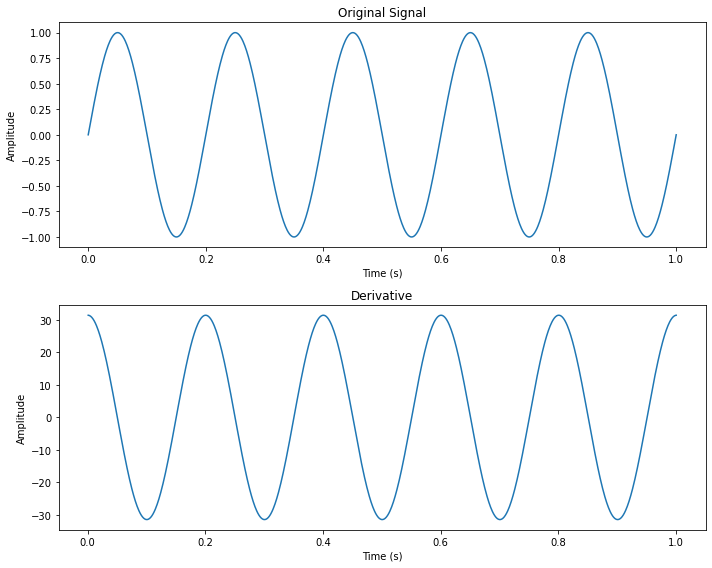

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a signal
t = np.linspace(0, 1, 1000)  # Time axis
f = 5  # Frequency (Hz)
x = np.sin(2*np.pi*f*t)  # Signal

# Compute the derivative using central differences
dt = t[1] - t[0]  # Time step
dx = np.diff(x) / dt  # Central difference approximation of the derivative

# Pad the derivative array with NaNs to match the size of the time axis
dx = np.concatenate([[np.nan], dx])

# Plot the signal and its derivative
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

axs[0].plot(t, x)
axs[0].set_title('Original Signal')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Amplitude')

axs[1].plot(t, dx)
axs[1].set_title('Derivative')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()


```
# Compute the derivative using central differences
dt = t[1] - t[0]  # Time step
dx = np.diff(x) / dt  # Central difference approximation of the derivative
```
The central difference method is a numerical approximation that estimates the derivative of a signal at a given point x[i] as the average slope of the signal over a small interval around x[i]. Specifically, it uses the difference between x[i+1] and x[i-1] divided by the difference between t[i+1] and t[i-1], which is the time step dt. In other words, the central difference method approximates the derivative as:

`dx[i] = (x[i+1] - x[i-1]) / (t[i+1] - t[i-1]) `

Note that this method uses two neighboring samples to estimate the slope, hence the term "central difference". The derivative computed this way has second-order accuracy, which means that the error of the approximation is proportional to the square of the time step dt. However, it's also prone to noise amplification and aliasing if the signal is not properly sampled or if the time step is too large. Therefore, it's important to choose an appropriate time step and filtering method to avoid these issues.


```
# Pad the derivative array with NaNs to match the size of the time axis
dx = np.concatenate([[np.nan], dx])
```
In the code snippet I provided earlier, we padded the derivative array dx with a NaN value at the beginning using NumPy's concatenate function. This is because the central difference method reduces the size of the array by one element compared to the original signal. Therefore, we need to add a NaN value to the beginning of the dx array to align it with the original signal x in terms of size and time axis. This makes it easier to plot both signals on the same graph and avoid any indexing errors.

The concatenate function is used to join the NaN value with the beginning of the dx array. The [[np.nan], dx] syntax creates a new 2D array with a single row and two columns, where the first column contains a NaN value and the second column contains the elements of dx. The concatenate function then joins the two arrays along the first axis (rows) to produce a new 1D array with the same size as x. Note that the square brackets around np.nan are necessary to create a new axis for the NaN value, since dx is a 1D array and concatenate requires arrays with compatible shapes.


```
# Plot the signal and its derivative
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
```
In the code snippet you provided earlier, we create a new figure object and a pair of axes objects using Matplotlib's subplots function. The subplots function takes two arguments: the number of rows and columns of the subplots, and an optional figsize argument that specifies the size of the figure in inches.

In this case, we pass 2 as the number of rows and 1 as the number of columns, which creates a grid of two subplots stacked vertically. We also pass (10, 8) as the figsize argument, which creates a figure with a width of 10 inches and a height of 8 inches.

We then assign the resulting figure and axes objects to the variables fig and axs, respectively, which allows us to manipulate them later.


```
axs[0].plot(t, x)
axs[0].set_title('Original Signal')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Amplitude')

axs[1].plot(t, dx)
axs[1].set_title('Derivative')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Amplitude')
```
In the code snippet you provided earlier, we plot the original signal x and its derivative dx on separate axes objects using Matplotlib's plot function. We also set the title, x-axis label, and y-axis label for each subplot using the set_title, set_xlabel, and set_ylabel methods of the respective axes objects.

Note that we use the same time axis t for both plots, since the derivative was computed using central differences and therefore has the same number of samples as the original signal. By using the same time axis, we can directly compare the shapes and amplitudes of the two signals.

# **Integration**
Integration is the process of finding the area under a curve, which is equivalent to the total accumulation of a function over a given interval. Integration can be used to compute quantities such as displacement, velocity, acceleration, and energy, among others.

In the context of signal processing, integration is often used to compute the cumulative sum of a signal, which can be useful for removing DC offset, finding the mean or baseline level, or detecting changes in the overall trend of the signal.

To perform integration of a signal x over a time interval t, we can use the trapezoidal rule, which approximates the area under the curve using a series of trapezoids. The trapezoidal rule can be implemented in Python using NumPy's trapz function, which takes two arguments: the function values y and the sample points x. The trapz function returns the approximate integral of y over x.

In this example, we first generate a test signal x as a sine wave over a time interval t. We then compute the integral of x using the trapz function, which returns a scalar value representing the area under the curve of x. We then plot the original signal and its cumulative sum on separate axes objects using Matplotlib's plot function and set the title, x-axis label, and y-axis label for each subplot using the set_title, set_xlabel, and set_ylabel methods of the respective axes objects. Finally, we call the tight_layout function to adjust the spacing between the subplots and show the figure using the show function.

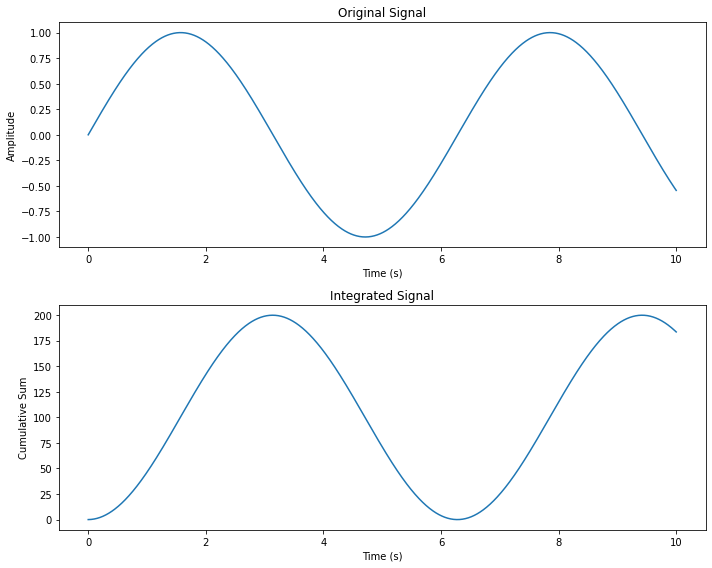

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a test signal
t = np.linspace(0, 10, 1000)
x = np.sin(t)

# Integrate the signal using the trapezoidal rule
integral = np.trapz(x, t)

# Plot the signal and its integral
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

axs[0].plot(t, x)
axs[0].set_title('Original Signal')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Amplitude')

axs[1].plot(t, np.cumsum(x))
axs[1].set_title('Integrated Signal')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Cumulative Sum')

plt.tight_layout()
plt.show()


```
# Integrate the signal using the trapezoidal rule
integral = np.trapz(x, t)
```
The np.trapz function computes the definite integral of the input signal x with respect to its independent variable t using the trapezoidal rule, which approximates the area under the curve as a series of trapezoids. The function takes two arguments: the function values x and the sample points t.

In our example, we used np.trapz(x, t) to compute the integral of the signal x with respect to time t. The resulting integral variable stores the approximate area under the curve of x over the interval defined by t.


```
axs[0].plot(t, x)
axs[0].set_title('Original Signal')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Amplitude')

axs[1].plot(t, np.cumsum(x))
axs[1].set_title('Integrated Signal')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Cumulative Sum')
```
The above code calculates the integral of a signal using the trapezoidal rule and plots the original signal and its integrated version. The np.trapz function is used to perform the integration.

To compute the integral, the np.trapz function takes two arguments: the signal to integrate and the corresponding time values. The output of the function is the integral of the signal over the given time interval.

The np.cumsum function is then used to compute the cumulative sum of the signal, which gives the integrated signal.

The resulting plot shows the original signal in the top subplot and its integrated version in the bottom subplot. The x-axis shows the time in seconds, and the y-axis shows the signal amplitude and the cumulative sum, respectively.
